# Problem Statement:


I was hired by a company that flips houses to determine what features of a house impact price the most. 

I want to find the cheapest feature(s) to add to a house that will yield the largest value growth.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import local_EDA as L

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

### Reading in the data

In [2]:
df = pd.read_csv('../datasets/train.csv')

In [3]:
# Getting rid of spaces in column names
df.columns = df.columns.str.replace(' ', '')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MSSubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
LotFrontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
LotArea,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
OverallQual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
OverallCond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
YearBuilt,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
YearRemod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
MasVnrArea,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [5]:
df.describe(include='object').T

,count,unique,top,freq
MSZoning,2051,7,RL,1598
Street,2051,2,Pave,2044
Alley,140,2,Grvl,85
LotShape,2051,4,Reg,1295
LandContour,2051,4,Lvl,1843
Utilities,2051,3,AllPub,2049
LotConfig,2051,5,Inside,1503
LandSlope,2051,3,Gtl,1953
Neighborhood,2051,28,NAmes,310
Condition1,2051,9,Norm,1767


Seeing what features have the highest correlation on house price

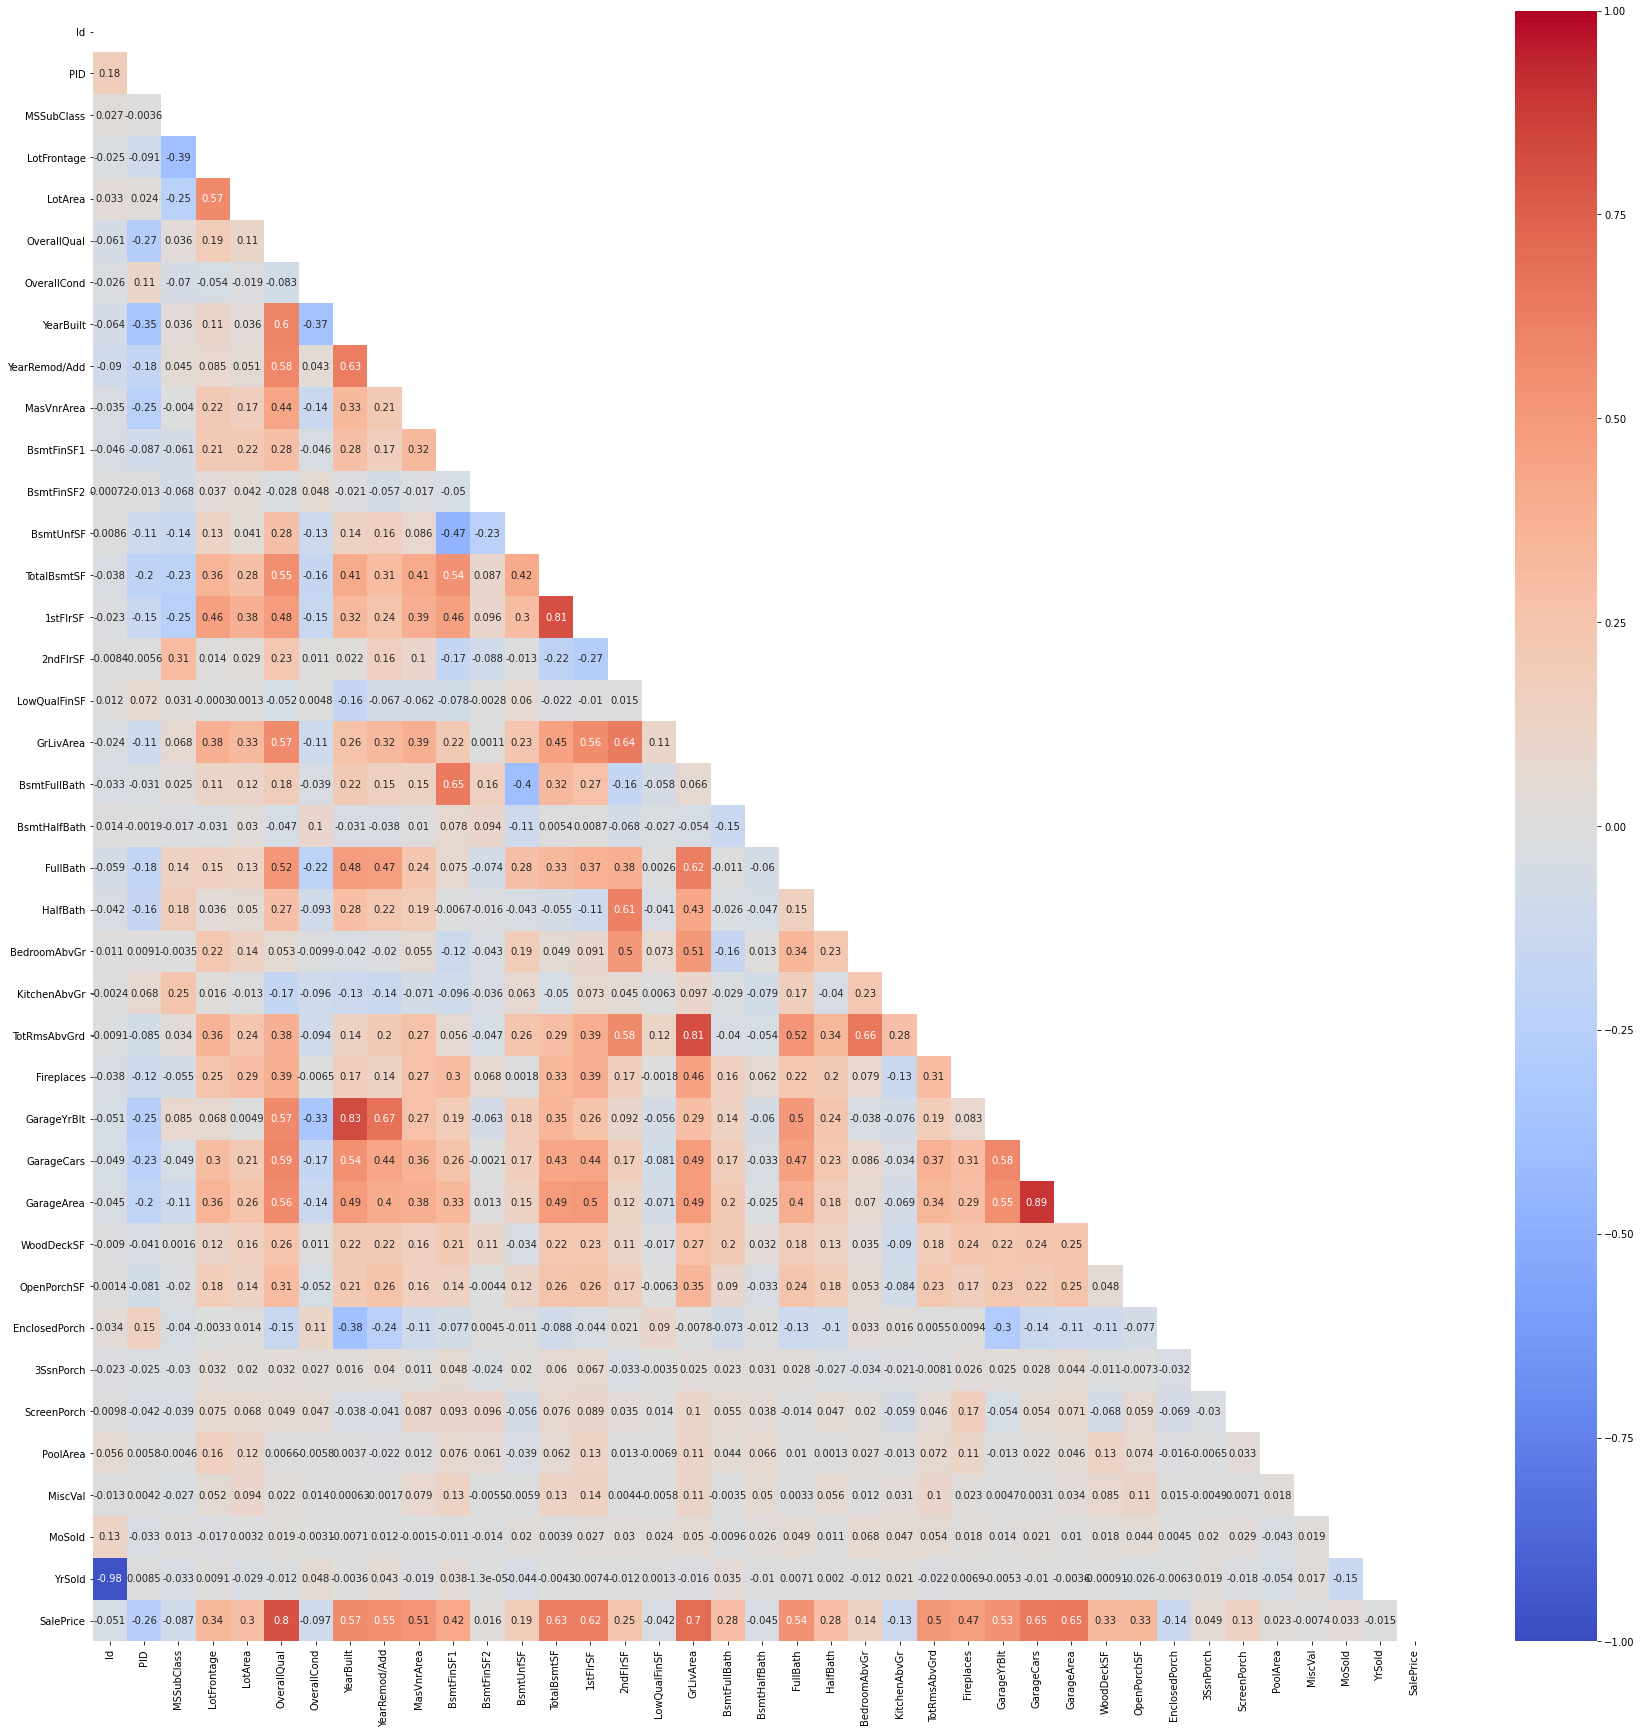

In [6]:
L.heat(df, 'SalePrice', x=30, y=30)

In [7]:
df.GrLivArea.sort_values()

1428     334
432      438
1518     480
1643     492
1292     498
        ... 
1035    3608
1897    3672
616     3820
1885    5095
960     5642
Name: GrLivArea, Length: 2051, dtype: int64

Visually checking each high-correlation feature

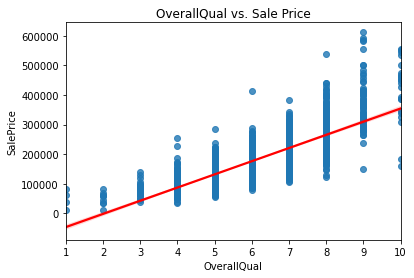

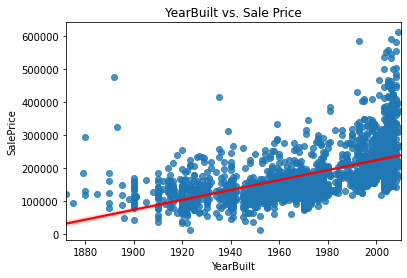

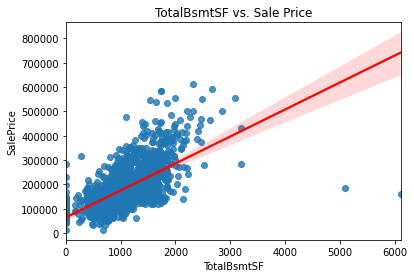

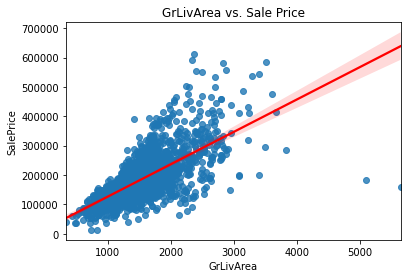

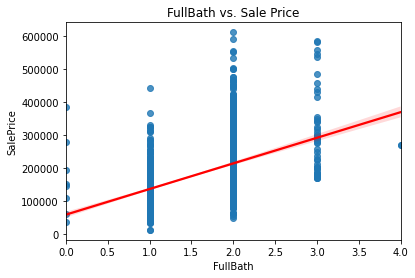

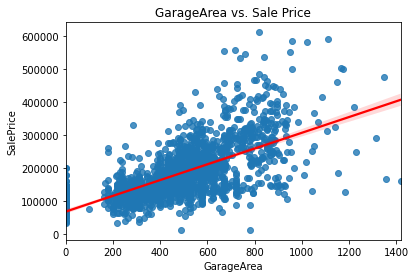

In [8]:
high_corrs = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageArea']
for col in high_corrs:
    plt.title(f'{col} vs. Sale Price')
    sns.regplot(data=df, y='SalePrice', x=col, line_kws={'color': 'red'})
    plt.show()

Dropping outliers (as prescribed by the data dictionary)

In [9]:
outliers = df[df.TotalBsmtSF > 4000].index

In [10]:
df.drop(outliers, inplace=True)

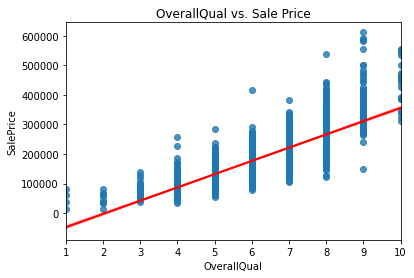

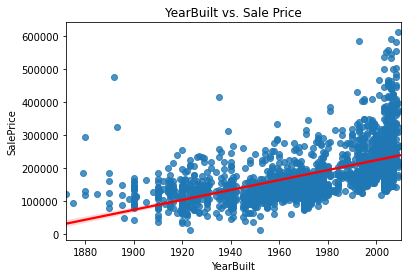

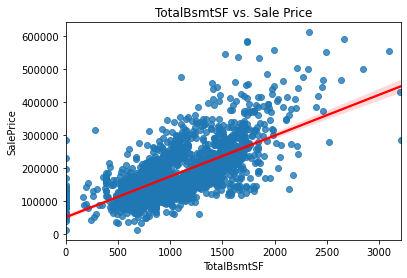

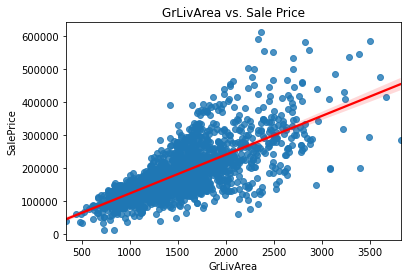

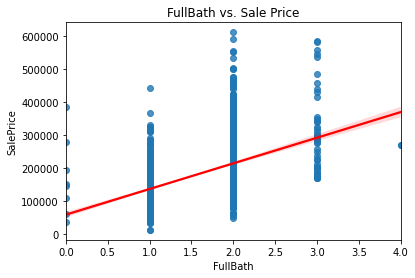

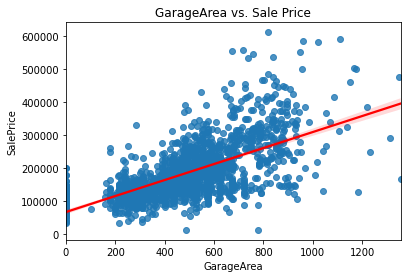

In [11]:
high_corrs = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageArea']
for col in high_corrs:
    plt.title(f'{col} vs. Sale Price')
    sns.regplot(data=df, y='SalePrice', x=col, line_kws={'color': 'red'})
    plt.show()

In [12]:
high_corrs.append('SalePrice')
high_corrs

['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'GarageArea',
 'SalePrice']

In [13]:
df2 = df[high_corrs]

Checking all high-correlation features against each other to find collinearity

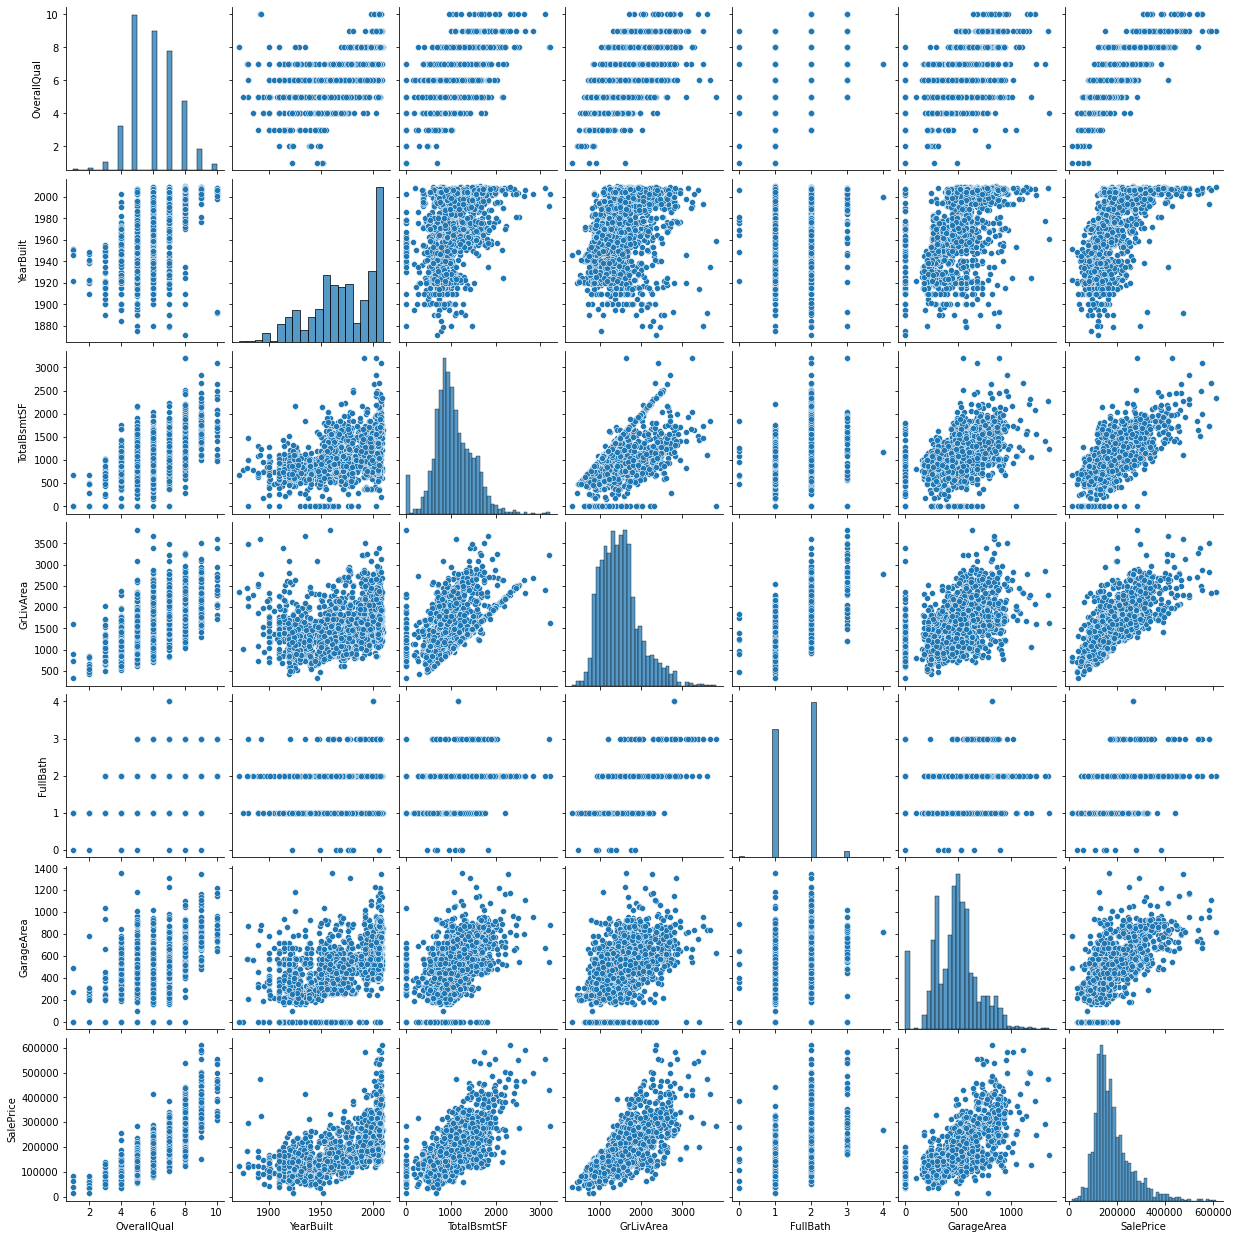

In [14]:
sns.pairplot(df2);

In [15]:
df.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [16]:
df[['GrLivArea','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd']].head()

,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd
0,1479,2,1,3,1,6
1,2122,2,1,4,1,8
2,1057,1,0,3,1,5
3,1444,2,1,3,1,7
4,1445,2,0,3,1,6


Engineering a new feature (sqft_per_room) based off of two highly collinear features ('ground floor living area' and 'total rooms above ground')

In [17]:
df['sqft_per_room'] = df.GrLivArea / df.TotRmsAbvGrd

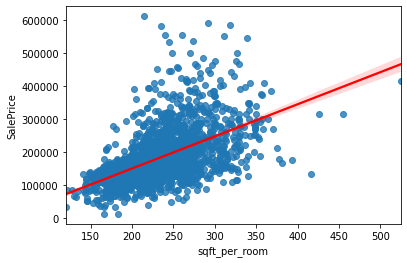

In [18]:
sns.regplot(data=df, x='sqft_per_room', y='SalePrice', line_kws={'color': 'red'});


In [19]:
df2.head()
df2.drop(columns='GrLivArea', inplace=True)
df2.append(df.sqft_per_room)

C:\Users\c24th\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,OverallQual,YearBuilt,TotalBsmtSF,FullBath,GarageArea,SalePrice,0,1,2,3,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,6.0,1976.0,725.0,2.0,475.0,130500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.0,1996.0,913.0,2.0,559.0,220000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,1953.0,1057.0,1.0,246.0,109000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,2006.0,384.0,2.0,400.0,174000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,1900.0,676.0,2.0,484.0,138500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,4.0,1940.0,861.0,1.0,539.0,82500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2048,6.0,1928.0,896.0,1.0,342.0,177000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2049,4.0,1956.0,1200.0,1.0,294.0,144000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2050,7.0,1999.0,994.0,2.0,442.0,189000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df2.head()

,OverallQual,YearBuilt,TotalBsmtSF,FullBath,GarageArea,SalePrice
0,6,1976,725.0,2,475.0,130500
1,7,1996,913.0,2,559.0,220000
2,5,1953,1057.0,1,246.0,109000
3,5,2006,384.0,2,400.0,174000
4,6,1900,676.0,2,484.0,138500


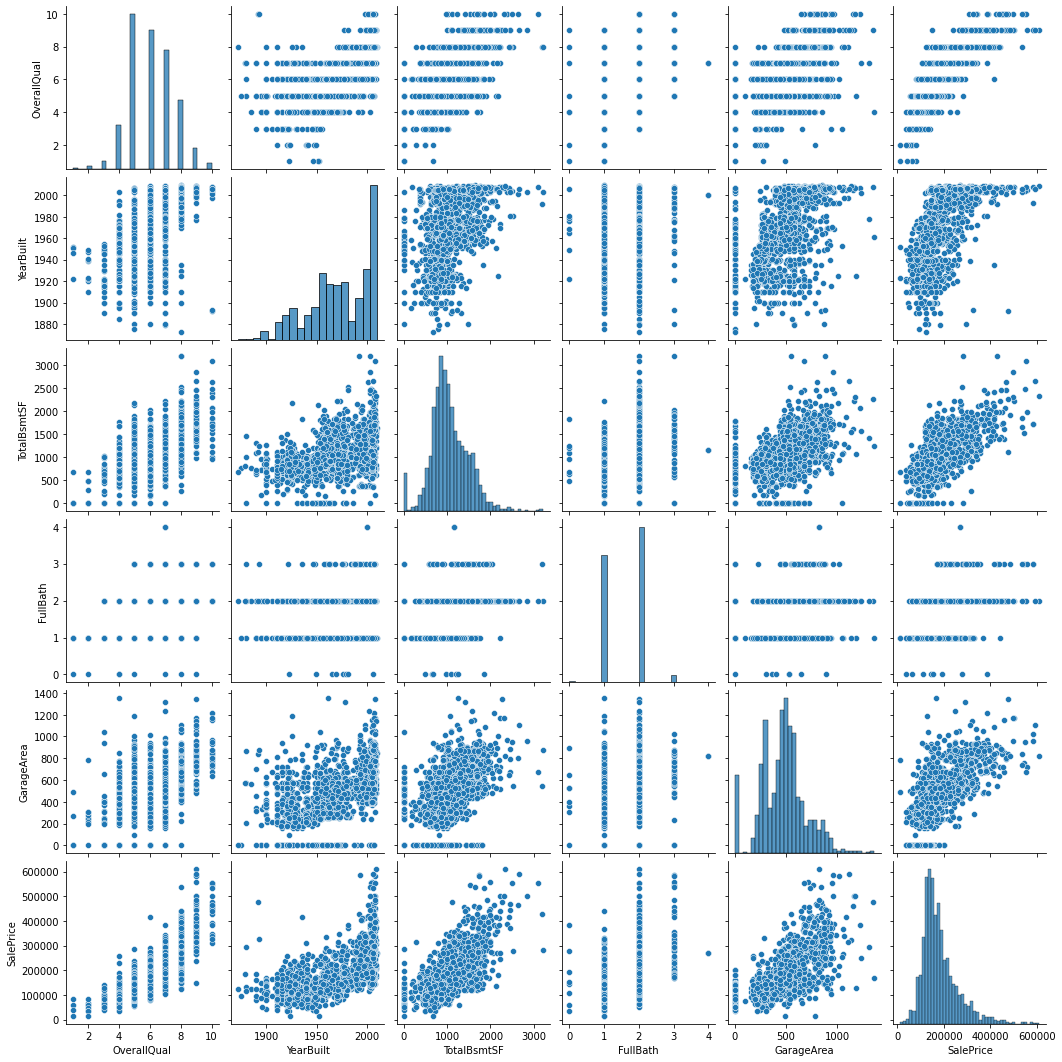

In [21]:
# df2.drop(columns='FullBath', inplace=True)
sns.pairplot(df2);

In [22]:
df.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

Creating 'total finished sqft' from the 4 individual sqft columns

In [23]:
df['tot_fin_sqft'] = df.BsmtFinSF1 + df.BsmtFinSF2 + df['1stFlrSF'] + df['2ndFlrSF']

In [24]:
df2.drop(columns='TotalBsmtSF', inplace=True)

C:\Users\c24th\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
df2['tot_fin_sqft'] = df.tot_fin_sqft

<ipython-input-25-c9d1aad2a1b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tot_fin_sqft'] = df.tot_fin_sqft


In [26]:
df2.head()

,OverallQual,YearBuilt,FullBath,GarageArea,SalePrice,tot_fin_sqft
0,6,1976,2,475.0,130500,2012.0
1,7,1996,2,559.0,220000,2759.0
2,5,1953,1,246.0,109000,1788.0
3,5,2006,2,400.0,174000,1444.0
4,6,1900,2,484.0,138500,1445.0


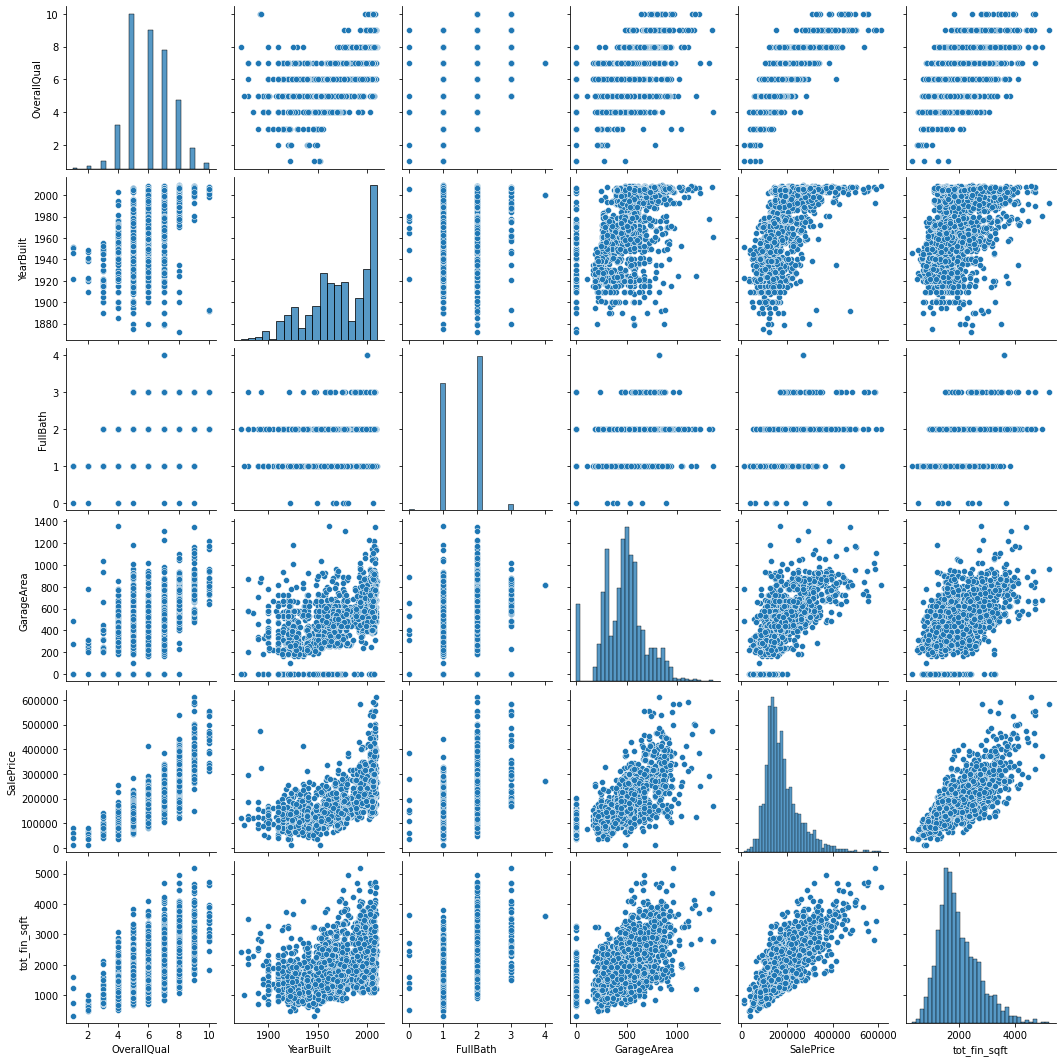

In [27]:
sns.pairplot(df2);

Checking correlation of all features including our new 'total finished sqft' column

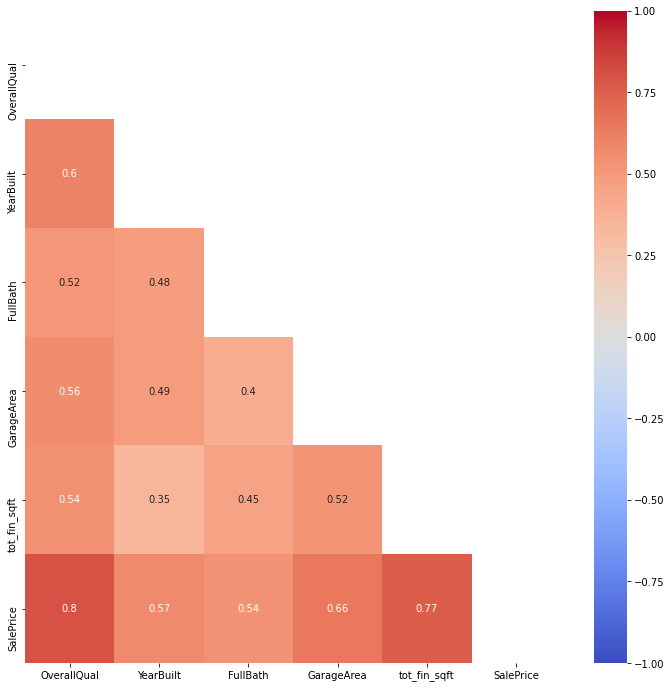

In [28]:
L.heat(df2, 'SalePrice')

In [29]:
df2.isna().sum()

OverallQual     0
YearBuilt       0
FullBath        0
GarageArea      1
SalePrice       0
tot_fin_sqft    1
dtype: int64

In [30]:
df2.dropna(inplace=True)

<ipython-input-30-f66736151044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


Fitting a linear regression model

In [31]:
X = df2.drop(columns='SalePrice')
y = df2.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

In [32]:
model = LinearRegression()

In [33]:
cross_val_score(model, X_train, y_train)

array([0.82374539, 0.80267976, 0.80448125, 0.83774308, 0.79920572])

In [34]:
model.fit(X_train, y_train)

LinearRegression()

Coefficient scores (***ceteris paribus***, with a one-unit increase in *feature*, we can expect *X* change in sale price of the house)

In [35]:
list(zip(X.columns, model.coef_))

[('OverallQual', 25118.93958005018),
 ('YearBuilt', 200.93237430681418),
 ('FullBath', 3475.124703842682),
 ('GarageArea', 54.74253489938731),
 ('tot_fin_sqft', 44.291056246307335)]

In [36]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8164595100840208, 0.8392563748438293)

In [37]:
y_hat = model.predict(X_test)

Root Mean Squared Error; all of our predictions are within a range of ~30,000

In [38]:
mean_squared_error(y_test, y_hat, squared=False)

30827.333914186147

In [39]:
df.KitchenQual.value_counts(dropna=False)

TA    1047
Gd     806
Ex     149
Fa      47
Name: KitchenQual, dtype: int64

In [40]:
df.KitchenQual = df.KitchenQual.map({'Ex': 25, 'Gd': 16, 'TA': 9, 'Fa': 4, 'Po': 1})

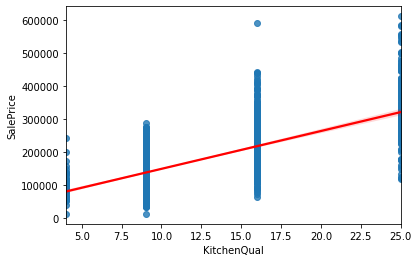

In [41]:
sns.regplot(data=df, x='KitchenQual', y='SalePrice', line_kws={'color': 'red'});

In [42]:
df.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

These are all the features that would be feasible to improve for a house-flipper. We're going to do some light cleaning and analysis of these features, as well as some feature combinations in preparation for modeling in another notebook

In [43]:
improvable_features = ['OverallQual', 'OverallCond', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 
                       'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 
                       'Electrical', 'Functional', 'Fireplaces', 'FireplaceQu', 'KitchenQual',
                       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
                       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence',
                       'sqft_per_room', 'tot_fin_sqft', 'SalePrice']

In [44]:
idf = df[improvable_features]

In [45]:
idf.head()

,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtCond,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,sqft_per_room,tot_fin_sqft,SalePrice
0,6,8,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,TA,...,44,0,0,0,0,NaN,NaN,246.500000,2012.0,130500
1,7,5,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,TA,...,74,0,0,0,0,NaN,NaN,265.250000,2759.0,220000
2,5,7,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,TA,...,52,0,0,0,0,NaN,NaN,211.400000,1788.0,109000
3,5,5,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,TA,...,0,0,0,0,0,NaN,NaN,206.285714,1444.0,174000
4,6,8,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,Gd,...,59,0,0,0,0,NaN,NaN,240.833333,1445.0,138500


In [46]:
idf.isna().sum()

OverallQual         0
OverallCond         0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         22
MasVnrArea         22
ExterQual           0
ExterCond           0
BsmtCond           55
BsmtFinType1       55
BsmtFinType2       56
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
Functional          0
Fireplaces          0
FireplaceQu      1000
KitchenQual         0
GarageQual        114
GarageCond        114
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           2041
Fence            1649
sqft_per_room       0
tot_fin_sqft        1
SalePrice           0
dtype: int64

In [47]:
idf.MasVnrType.value_counts(dropna=False)

None       1218
BrkFace     630
Stone       166
NaN          22
BrkCmn       13
Name: MasVnrType, dtype: int64

In [48]:
idf.MasVnrType.fillna('None', inplace=True)

C:\Users\c24th\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [49]:
idf.MasVnrType.value_counts(dropna=False)

None       1240
BrkFace     630
Stone       166
BrkCmn       13
Name: MasVnrType, dtype: int64

In [50]:
idf.MasVnrArea.fillna(0, inplace=True)

In [51]:
idf.groupby('BsmtFinType1')['BsmtFinType2'].value_counts(dropna=False)

BsmtFinType1  BsmtFinType2
ALQ           Unf             226
              Rec              25
              BLQ              23
              LwQ              16
              GLQ               3
BLQ           Unf             143
              Rec              28
              LwQ              18
              GLQ               7
              ALQ               3
              BLQ               1
GLQ           Unf             567
              Rec              17
              ALQ              11
              LwQ              11
              BLQ               6
              NaN               1
LwQ           Unf              64
              ALQ              11
              Rec              10
              GLQ               9
              BLQ               8
Rec           Unf             144
              LwQ              15
              ALQ              10
              BLQ              10
              GLQ               4
Unf           Unf             603
Name: BsmtFinType2, d

In [52]:
idf.BsmtFinType1.fillna('Nb', inplace=True)
idf.BsmtFinType2.fillna('Nb', inplace=True)

In [53]:
idf.BsmtFinType1 = idf.BsmtFinType1.map({'GLQ': 36, 'ALQ': 25, 'BLQ': 16, 'Rec': 9, 'LwQ': 4, 'Unf': 1, 'Nb': 0})
idf.BsmtFinType2 = idf.BsmtFinType2.map({'GLQ': 36, 'ALQ': 25, 'BLQ': 16, 'Rec': 9, 'LwQ': 4, 'Unf': 1, 'Nb': 0})
idf['bsmt_fin_int'] = idf.BsmtFinType1 + idf.BsmtFinType2

C:\Users\c24th\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-53-8ad1d9513749>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['bsmt_fin_int'] = idf.BsmtFinType1 + idf.BsmtFinType2


In [54]:
idf.bsmt_fin_int.value_counts(dropna=False)

2     603
37    567
26    226
10    144
17    143
5      64
0      55
25     38
34     35
29     27
20     26
41     26
13     25
45     21
40     20
61     14
52     13
36      1
32      1
Name: bsmt_fin_int, dtype: int64

In [55]:
idf.drop(columns=['BsmtFinType1', 'BsmtFinType2'], inplace=True)

C:\Users\c24th\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
idf.isna().sum()

OverallQual         0
OverallCond         0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
BsmtCond           55
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
Functional          0
Fireplaces          0
FireplaceQu      1000
KitchenQual         0
GarageQual        114
GarageCond        114
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           2041
Fence            1649
sqft_per_room       0
tot_fin_sqft        1
SalePrice           0
bsmt_fin_int        0
dtype: int64

In [57]:
idf.BsmtCond.sort_values()

614      Ex
102      Ex
1578     Ex
970      Fa
162      Fa
       ... 
1859    NaN
1875    NaN
1889    NaN
1933    NaN
2010    NaN
Name: BsmtCond, Length: 2049, dtype: object

In [58]:
idf.BsmtCond.fillna('Nb', inplace=True)

In [59]:
idf.BsmtCond = idf.BsmtCond.map({'Ex': 25, 'Gd': 16, 'TA': 9, 'Fa': 4, 'Po': 1, 'Nb': 0})

In [60]:
idf.TotalBsmtSF.dropna(inplace=True)

<ipython-input-60-2d7c670c63b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf.TotalBsmtSF.dropna(inplace=True)


In [61]:
idf.FireplaceQu.value_counts(dropna=False)

NaN    1000
Gd      521
TA      407
Fa       59
Ex       31
Po       31
Name: FireplaceQu, dtype: int64

In [62]:
idf.FireplaceQu.fillna('Nf', inplace=True)

In [63]:
idf.FireplaceQu = idf.FireplaceQu.map({'Ex': 25, 'Gd': 16, 'TA': 9, 'Fa': 4, 'Po': 1, 'Nf': 0})

In [64]:
idf.GarageCond.fillna('Ng', inplace=True)
idf.GarageQual.fillna('Ng', inplace=True)

In [65]:
idf.GarageCond = idf.GarageCond.map({'Ex': 25, 'Gd': 16, 'TA': 9, 'Fa': 4, 'Po': 1, 'Ng': 0})
idf.GarageQual = idf.GarageQual.map({'Ex': 25, 'Gd': 16, 'TA': 9, 'Fa': 4, 'Po': 1, 'Ng': 0})
idf['garage_qc'] = idf.GarageCond * idf.GarageQual

<ipython-input-65-7141c5c4ddfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['garage_qc'] = idf.GarageCond * idf.GarageQual


In [66]:
idf.isna().sum()

OverallQual         0
OverallCond         0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
BsmtCond            0
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
Functional          0
Fireplaces          0
FireplaceQu         0
KitchenQual         0
GarageQual          0
GarageCond          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           2041
Fence            1649
sqft_per_room       0
tot_fin_sqft        1
SalePrice           0
bsmt_fin_int        0
garage_qc           0
dtype: int64

In [67]:
idf.TotalBsmtSF.fillna(0, inplace=True)

In [68]:
idf.PoolQC.fillna('Np', inplace=True)

In [69]:
idf.PoolQC = idf.PoolQC.map({'Ex': 25, 'Gd': 16, 'TA': 9, 'Fa': 4, 'Po': 1, 'Np': 0})

In [70]:
idf.Fence.fillna('Nf', inplace=True)

In [71]:
idf.Fence = idf.Fence.map({'GdPrv': 16, 'MnPrv': 9, 'GdWo': 4, 'MnWw': 1, 'Nf': 0})

In [72]:
idf.tot_fin_sqft.dropna(inplace=True)

<ipython-input-72-588f27c4023b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf.tot_fin_sqft.dropna(inplace=True)


In [73]:
idf.isna().sum()

OverallQual      0
OverallCond      0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtCond         0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
Functional       0
Fireplaces       0
FireplaceQu      0
KitchenQual      0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
sqft_per_room    0
tot_fin_sqft     1
SalePrice        0
bsmt_fin_int     0
garage_qc        0
dtype: int64

In [74]:
idf.tot_fin_sqft.sort_values()

1428     334.0
1292     498.0
77       520.0
1518     530.0
807      572.0
         ...  
823     4695.0
1164    4708.0
786     4958.0
1692    5185.0
1327       NaN
Name: tot_fin_sqft, Length: 2049, dtype: float64

In [75]:
idf.drop(1327, inplace=True)

In [76]:
idf.isna().sum()

OverallQual      0
OverallCond      0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtCond         0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
Functional       0
Fireplaces       0
FireplaceQu      0
KitchenQual      0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
sqft_per_room    0
tot_fin_sqft     0
SalePrice        0
bsmt_fin_int     0
garage_qc        0
dtype: int64

In [77]:
idf.describe().T

,count,mean,std,min,25%,50%,75%,max
OverallQual,2048.0,6.109375,1.421363,1.0,5.0,6.000000,7.000,10.000000
OverallCond,2048.0,5.562012,1.104710,1.0,5.0,5.000000,6.000,9.000000
MasVnrArea,2048.0,97.784668,171.964817,0.0,0.0,0.000000,158.000,1600.000000
BsmtCond,2048.0,8.912109,2.363228,0.0,9.0,9.000000,9.000,25.000000
TotalBsmtSF,2048.0,1053.549805,426.283435,0.0,793.0,994.000000,1317.250,3206.000000
Fireplaces,2048.0,0.589355,0.635864,0.0,0.0,1.000000,1.000,4.000000
FireplaceQu,2048.0,6.367676,7.115906,0.0,0.0,1.000000,16.000,25.000000
KitchenQual,2048.0,12.804199,4.901297,4.0,9.0,9.000000,16.000,25.000000
GarageQual,2048.0,8.375977,2.447744,0.0,9.0,9.000000,9.000,25.000000
GarageCond,2048.0,8.409668,2.350284,0.0,9.0,9.000000,9.000,25.000000


In [78]:
idf.describe(include='object').T

,count,unique,top,freq
RoofMatl,2048,5,CompShg,2023
Exterior1st,2048,15,VinylSd,724
Exterior2nd,2048,15,VinylSd,721
MasVnrType,2048,4,None,1239
ExterQual,2048,4,TA,1246
ExterCond,2048,5,TA,1775
Heating,2048,5,GasA,2015
HeatingQC,2048,5,Ex,1063
CentralAir,2048,2,Y,1907
Electrical,2048,5,SBrkr,1866


In [79]:
for col in ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']:
    idf[col] = idf[col].map(lambda x: 1 if x > 0 else 0)

<ipython-input-79-e7ae5f5fb310>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf[col] = idf[col].map(lambda x: 1 if x > 0 else 0)


In [80]:
idf.rename(columns={'WoodDeckSF': 'has_wood_deck', 'OpenPorchSF': 'has_open_porch', 
                    'EnclosedPorch': 'has_encl_porch', '3SsnPorch': 'has_3ssn_porch',
                    'ScreenPorch': 'has_screen_porch'}, inplace=True)

C:\Users\c24th\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [81]:
idf.PoolQC.value_counts(dropna=False)

0     2040
16       3
4        2
9        2
25       1
Name: PoolQC, dtype: int64

In [82]:
idf['pool_qual_int'] = idf.PoolQC * idf.PoolArea

<ipython-input-82-807b57fca305>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['pool_qual_int'] = idf.PoolQC * idf.PoolArea


In [83]:
idf.RoofMatl.value_counts(dropna=False)

CompShg    2023
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
Name: RoofMatl, dtype: int64

In [84]:
idf.RoofMatl = idf.RoofMatl.map(lambda x: 1 if x == 'CompShg' else 0)
idf.rename(columns={'RoofMatl': 'comp_shingle_roof'}, inplace=True)

C:\Users\c24th\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [85]:
idf.Exterior1st.value_counts()

VinylSd    724
MetalSd    330
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     89
BrkFace     64
WdShing     45
AsbShng     33
Stucco      26
BrkComm      3
CBlock       2
Stone        2
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [86]:
idf.Exterior1st = idf.Exterior1st.map(lambda x: x if x in ['VinylSd', 
                                                           'MetalSd', 'HdBoard', 
                                                           'Wd Sdng', 'Plywood'] else 'Other')

In [87]:
idf.Exterior1st.value_counts()

VinylSd    724
MetalSd    330
HdBoard    300
Wd Sdng    276
Other      266
Plywood    152
Name: Exterior1st, dtype: int64

In [88]:
idf.Exterior2nd.value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     89
Wd Shng     63
BrkFace     34
Stucco      29
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       1
Name: Exterior2nd, dtype: int64

In [89]:
idf.Exterior2nd = idf.Exterior2nd.map(lambda x: x if x in ['VinylSd', 
                                                           'MetalSd', 'HdBoard', 
                                                           'Wd Sdng', 'Plywood'] else 'Other')

In [90]:
idf.MasVnrType.value_counts()

None       1239
BrkFace     630
Stone       166
BrkCmn       13
Name: MasVnrType, dtype: int64

In [91]:
idf.ExterCond.value_counts()

TA    1775
Gd     215
Fa      49
Ex       7
Po       2
Name: ExterCond, dtype: int64

In [92]:
idf.ExterCond = idf.ExterCond.map({'Ex': 25, 'Gd': 16, 'TA': 9, 'Fa': 4, 'Po': 1})
idf.ExterQual = idf.ExterQual.map({'Ex': 25, 'Gd': 16, 'TA': 9, 'Fa': 4, 'Po': 1})
idf['exterior_qc'] = idf.ExterCond * idf.ExterQual

<ipython-input-92-9cfa13fff0dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['exterior_qc'] = idf.ExterCond * idf.ExterQual


In [93]:
idf.columns

Index(['OverallQual', 'OverallCond', 'comp_shingle_roof', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtCond', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'Functional', 'Fireplaces', 'FireplaceQu', 'KitchenQual',
       'GarageQual', 'GarageCond', 'PavedDrive', 'has_wood_deck',
       'has_open_porch', 'has_encl_porch', 'has_3ssn_porch',
       'has_screen_porch', 'PoolArea', 'PoolQC', 'Fence', 'sqft_per_room',
       'tot_fin_sqft', 'SalePrice', 'bsmt_fin_int', 'garage_qc',
       'pool_qual_int', 'exterior_qc'],
      dtype='object')

In [94]:
idf['overall_qc'] = idf.OverallCond * idf.OverallQual

<ipython-input-94-71a7e769bd03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['overall_qc'] = idf.OverallCond * idf.OverallQual


In [95]:
idf.drop(columns=['ExterQual', 'ExterCond', 'GarageQual', 'GarageCond', 
                  'PoolArea', 'PoolQC', 'OverallQual', 'OverallCond'], inplace=True)

C:\Users\c24th\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [96]:
idf.columns

Index(['comp_shingle_roof', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtCond', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'Functional', 'Fireplaces', 'FireplaceQu',
       'KitchenQual', 'PavedDrive', 'has_wood_deck', 'has_open_porch',
       'has_encl_porch', 'has_3ssn_porch', 'has_screen_porch', 'Fence',
       'sqft_per_room', 'tot_fin_sqft', 'SalePrice', 'bsmt_fin_int',
       'garage_qc', 'pool_qual_int', 'exterior_qc', 'overall_qc'],
      dtype='object')

In [97]:
idf.Heating.value_counts()

GasA    2015
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64

In [98]:
idf.Heating = idf.Heating.map(lambda x: 1 if x == 'GasA' else 0)
idf.rename(columns={'Heating': 'forced_air_or_other'}, inplace=True)

In [99]:
idf.drop(columns='TotalBsmtSF', inplace=True)

In [100]:
idf.HeatingQC.value_counts()

Ex    1063
TA     596
Gd     319
Fa      67
Po       3
Name: HeatingQC, dtype: int64

In [101]:
idf.HeatingQC = idf.HeatingQC.map({'Ex': 25, 'Gd': 16, 'TA': 9, 'Fa': 4, 'Po': 1})

In [102]:
idf.CentralAir.value_counts()

Y    1907
N     141
Name: CentralAir, dtype: int64

In [103]:
idf.CentralAir = idf.CentralAir.map(lambda x: 1 if x == 'Y' else 0)

In [104]:
idf.columns

Index(['comp_shingle_roof', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtCond', 'forced_air_or_other', 'HeatingQC',
       'CentralAir', 'Electrical', 'Functional', 'Fireplaces', 'FireplaceQu',
       'KitchenQual', 'PavedDrive', 'has_wood_deck', 'has_open_porch',
       'has_encl_porch', 'has_3ssn_porch', 'has_screen_porch', 'Fence',
       'sqft_per_room', 'tot_fin_sqft', 'SalePrice', 'bsmt_fin_int',
       'garage_qc', 'pool_qual_int', 'exterior_qc', 'overall_qc'],
      dtype='object')

In [105]:
idf.Electrical.value_counts()

SBrkr    1866
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [106]:
idf.Electrical = idf.Electrical.map({'SBrkr': 25, 'FuseA': 16, 'FuseF': 9, 'FuseP': 4, 'Mix': 1})

In [107]:
idf.Functional.value_counts()

Typ     1912
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64

In [108]:
idf.Functional = idf.Functional.map({'Typ': 64, 'Min1': 49, 'Min2': 36, 'Mod': 25, 'Maj1': 16, 'Maj2': 9, 'Sev': 4, 'Sal': 1})

In [109]:
idf.Fireplaces.value_counts()

0    999
1    898
2    145
3      5
4      1
Name: Fireplaces, dtype: int64

In [110]:
idf.Fireplaces = idf.Fireplaces.map(lambda x: 1 if x > 0 else 0)

In [111]:
idf.PavedDrive.value_counts()

Y    1858
N     151
P      39
Name: PavedDrive, dtype: int64

In [112]:
idf.PavedDrive = idf.PavedDrive.map(lambda x: 1 if x == 'Y' else 0)

In [113]:
idf.columns

Index(['comp_shingle_roof', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtCond', 'forced_air_or_other', 'HeatingQC',
       'CentralAir', 'Electrical', 'Functional', 'Fireplaces', 'FireplaceQu',
       'KitchenQual', 'PavedDrive', 'has_wood_deck', 'has_open_porch',
       'has_encl_porch', 'has_3ssn_porch', 'has_screen_porch', 'Fence',
       'sqft_per_room', 'tot_fin_sqft', 'SalePrice', 'bsmt_fin_int',
       'garage_qc', 'pool_qual_int', 'exterior_qc', 'overall_qc'],
      dtype='object')

In [114]:
idf.rename(columns={'Exterior1st': 'siding_type', 'Exterior2nd': 'siding_type_2', 
                    'MasVnrType': 'masonry_type', 'MasVnrArea': 'masonry_area', 
                    'BsmtCond': 'bsmt_cond', 'HeatingQC': 'heating_qual', 
                    'CentralAir': 'has_central_air', 'Electrical': 'electrical_qual', 
                    'Functional': 'functionality', 'Fireplaces': 'num_fireplaces',
                    'FireplaceQu': 'fireplace_qual', 'KitchenQual': 'kitchen_qual', 
                    'PavedDrive': 'driveway_paved'}, inplace=True)

In [115]:
idf.drop(columns='siding_type_2', inplace=True)

In [116]:
idf.columns

Index(['comp_shingle_roof', 'siding_type', 'masonry_type', 'masonry_area',
       'bsmt_cond', 'forced_air_or_other', 'heating_qual', 'has_central_air',
       'electrical_qual', 'functionality', 'num_fireplaces', 'fireplace_qual',
       'kitchen_qual', 'driveway_paved', 'has_wood_deck', 'has_open_porch',
       'has_encl_porch', 'has_3ssn_porch', 'has_screen_porch', 'Fence',
       'sqft_per_room', 'tot_fin_sqft', 'SalePrice', 'bsmt_fin_int',
       'garage_qc', 'pool_qual_int', 'exterior_qc', 'overall_qc'],
      dtype='object')

In [117]:
idf.describe(include='object').T

,count,unique,top,freq
siding_type,2048,6,VinylSd,724
masonry_type,2048,4,None,1239


In [118]:
idf = pd.get_dummies(idf, drop_first=True)

In [119]:
idf.columns

Index(['comp_shingle_roof', 'masonry_area', 'bsmt_cond', 'forced_air_or_other',
       'heating_qual', 'has_central_air', 'electrical_qual', 'functionality',
       'num_fireplaces', 'fireplace_qual', 'kitchen_qual', 'driveway_paved',
       'has_wood_deck', 'has_open_porch', 'has_encl_porch', 'has_3ssn_porch',
       'has_screen_porch', 'Fence', 'sqft_per_room', 'tot_fin_sqft',
       'SalePrice', 'bsmt_fin_int', 'garage_qc', 'pool_qual_int',
       'exterior_qc', 'overall_qc', 'siding_type_MetalSd', 'siding_type_Other',
       'siding_type_Plywood', 'siding_type_VinylSd', 'siding_type_Wd Sdng',
       'masonry_type_BrkFace', 'masonry_type_None', 'masonry_type_Stone'],
      dtype='object')

Dropped dummies: 

`siding_type`: HardBoard

`masonry_type`: Common Brick

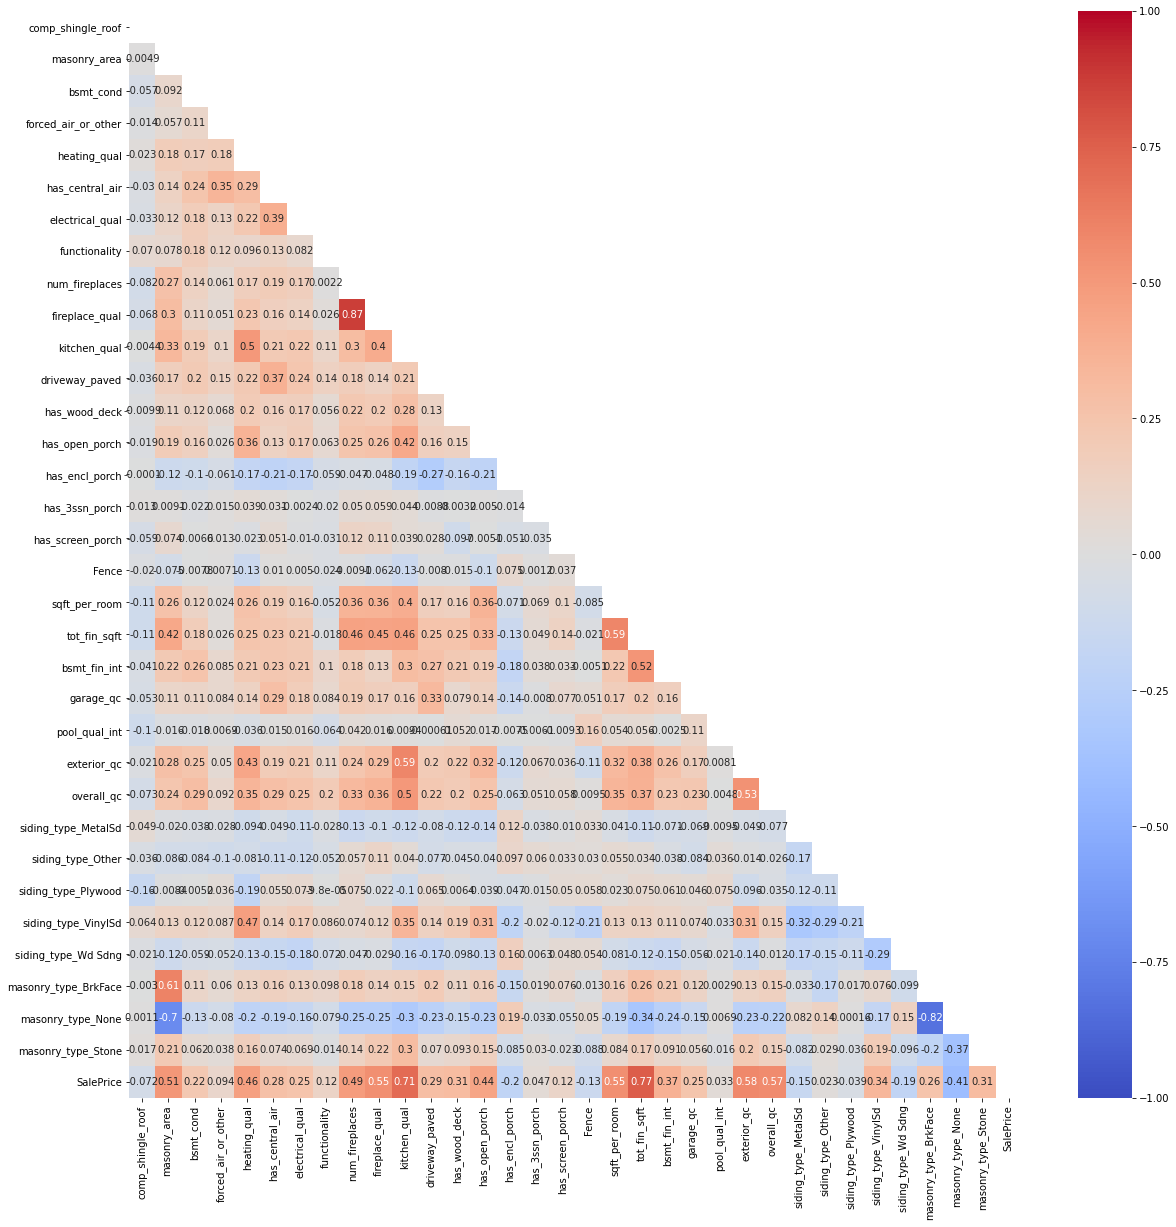

In [120]:
L.heat(idf, 'SalePrice', x=20, y=20)

In [121]:
idf.to_csv('../datasets/train_clean_3.csv', index=False)